In [1]:
from get_train_test_for_modeling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from format_train_test import *
plt.style.use('ggplot')

%matplotlib inline

In [2]:
from get_prediction_data import *

In [3]:
get_prediction_data()
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

In [164]:
prediction_df.columns

Index(['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY', 'TIDE',
       'Date', 'TempDate', 't_arrive', 'time_delta', 'time_y', 'time_y_hr'],
      dtype='object')

In [19]:
# making the training and testing data
filename = '../data/data_X_y_46059_train_w_tide.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','BAR_y','WVHT_y']

train_yrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007]
test_yrs  = [2008]

X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yrs, test_yrs)

In [20]:
# fitting a gradient booster model
n_estimators = 10000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=10000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
y_hat = gbr.predict(X_test)
mse_train = mean_squared_error(y_train, gbr.predict(X_train))
mse_test  = mean_squared_error(y_test, y_hat)
                              
r2  = r2_score(y_test, y_hat)
                              
print("MSE_train: %.4f" % mse_train)
print("MSE_test: %.4f"  % mse_test)
print("R2: %.4f" % r2)

MSE_train: 0.3322
MSE_test: 0.4287
R2: 0.4136


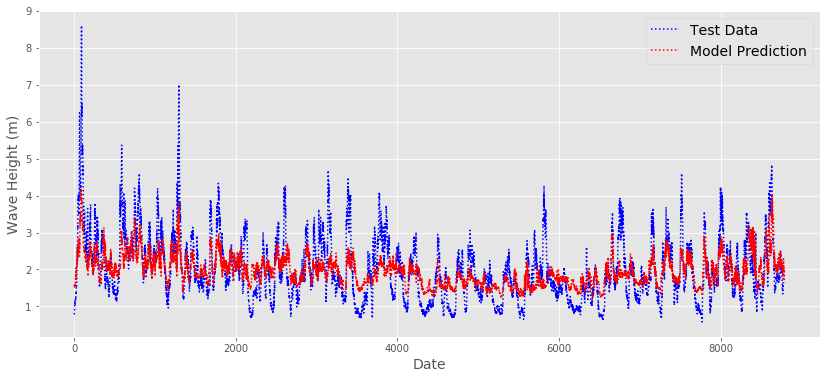

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test,':', color='b', label = 'Test Data')
ax.plot(y_hat,':', color='r', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

## pickling the model

with open(‘XC.pkl’, ‘wb’) as f:
   # Write the model to a file.
   pickle.dump(gbr, f)

with open(‘/home/ubuntu/soaring_predictor/XC.pkl’, ‘rb’) as f:
       XC = pickle.load(f)

In [ ]:
 s3.put_object(Bucket=malnor.bucket, Body=the file you're putting, Key=path including filename 

In [166]:
X_train, X_test, y_train, y_test = get_train_test(filename, cols_to_keep, train_yrs, test_yrs)

In [167]:
params = {'n_estimators': 2000, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, clf.predict(X_train))
mse_test = mean_squared_error(y_test, clf.predict(X_test))
r2  = r2_score(y_test, clf.predict(X_test))
print("MSE_train: %.4f" % mse_train)
print("MSE_test: %.4f"  % mse_test)
print("R2: %.4f" % r2)

MSE_train: 0.1970
MSE_test: 0.3118
R2: 0.5736


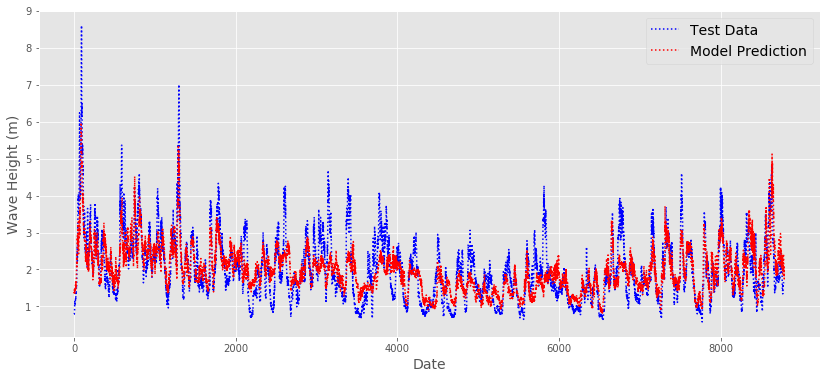

In [168]:
yhat = clf.predict(X_test)
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test,':', color='b', label = 'Test Data')
ax.plot(yhat,':', color='r', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

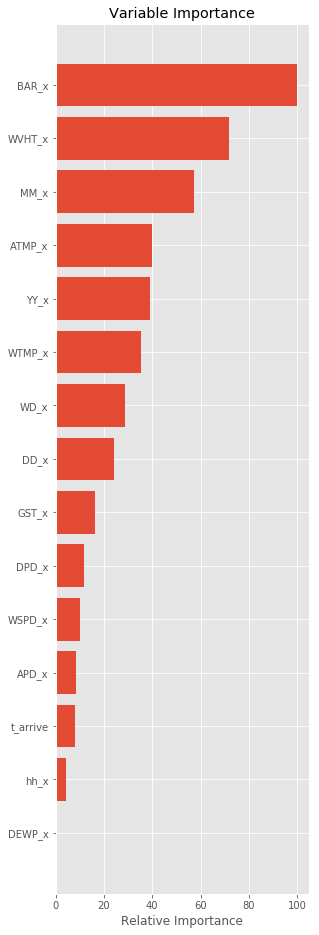

In [171]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10,16))
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(cols_to_keep)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [172]:
get_prediction_data()
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 't_arrive']

X_real_time_predictions = prediction_df[cols_to_keep].values

In [174]:
yhat_realtime = clf.predict(X_real_time_predictions)

In [187]:
forecast = pd.DataFrame(yhat_realtime)

In [188]:
forecast.index = prediction_df['time_y_hr']

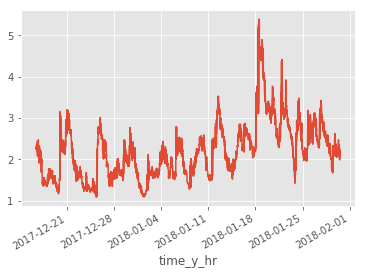

In [192]:
forecast[0].plot()

In [194]:
from get_prediction_data import*
get_prediction_data()
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

In [196]:
prediction_df.index = prediction_df['time_y_hr']

In [197]:
prediction_df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,DEWP,VIS,PTDY,TIDE,Date,TempDate,t_arrive,time_delta,time_y,time_y_hr
time_y_hr,,,,,,,,,,,,,,,,,,,,,
2018-01-30 12:00:00,2018,1,29,22,50,350.0,2.0,2.0,1.3,9,...,NaN,NaN,-0.4,NaN,2018-01-30 06:00:00,2018-01-29 22:00:00-08:00,14.276991,14:16:37.169047,2018-01-30 12:16:37.169047,2018-01-30 12:00:00
2018-01-30 12:00:00,2018,1,29,21,50,300.0,3.0,4.0,1.1,9,...,NaN,NaN,-0.0,NaN,2018-01-30 05:00:00,2018-01-29 21:00:00-08:00,15.841593,15:50:29.735518,2018-01-30 12:50:29.735518,2018-01-30 12:00:00
2018-01-30 12:00:00,2018,1,29,20,50,70.0,2.0,3.0,1.2,10,...,NaN,NaN,-0.4,NaN,2018-01-30 04:00:00,2018-01-29 20:00:00-08:00,16.061615,16:03:41.815178,2018-01-30 12:03:41.815178,2018-01-30 12:00:00
2018-01-30 11:00:00,2018,1,29,19,50,360.0,2.0,2.0,1.3,10,...,NaN,NaN,0.0,NaN,2018-01-30 03:00:00,2018-01-29 19:00:00-08:00,16.759946,16:45:35.807142,2018-01-30 11:45:35.807142,2018-01-30 11:00:00
2018-01-30 10:00:00,2018,1,29,18,50,340.0,3.0,5.0,1.3,10,...,NaN,NaN,1.2,NaN,2018-01-30 02:00:00,2018-01-29 18:00:00-08:00,16.759946,16:45:35.807142,2018-01-30 10:45:35.807142,2018-01-30 10:00:00


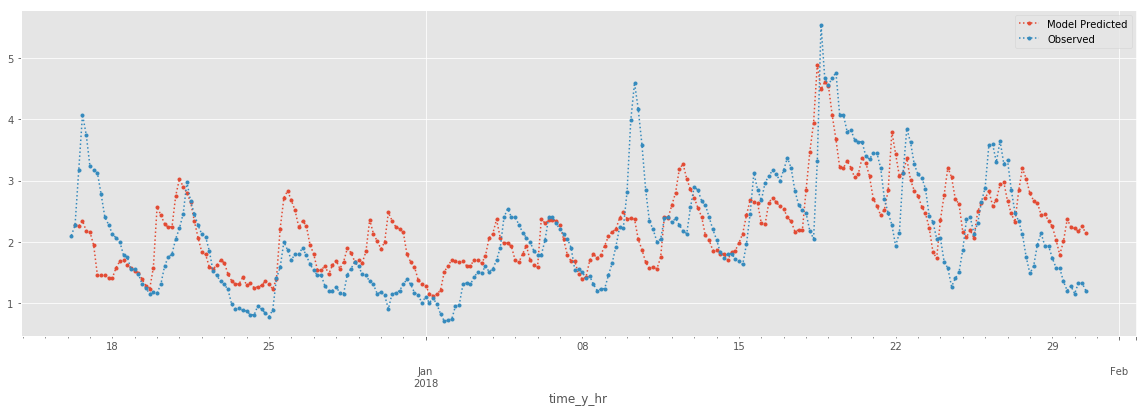

In [210]:
fig, ax = plt.subplots(figsize =(20,6))
forecast[0].resample('4H').mean().plot(marker = '.', linestyle=':', label='Model Predicted')
prediction_df['WVHT'].resample('4H').mean().plot(marker='.', linestyle=':', label='Observed')
plt.legend()